# 학습목표
 - Regression의 이해
 - LinearRegression의 이해
 - CrossValidation의 이해 
 - scikit-learn을 사용한 linear regression 예제

* ** supservised learning(지도 학습)**
 - feature(속성)와 target(정답) 데이터로 부터 학습을 진행하여 새로운 feature로 부터 target을 예측할 수 있는 학습 방법
 - 이때 target 데이터가 continuous이면 **regression(회기)**, categorical이면 **classification(분류)** 이라 함
   - classification e.g) 신문기사 카테고리 분류, 필기체 인식 
   - regression e.g) 집값 예측, 기대수명 예측
 

In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model

import matplotlib.pyplot as plt
# 그래프가 노트북 자체에 표시 되도록 함
%matplotlib inline

* 데이터 생성

In [2]:
# X를 학생이 시험 공부를 한 시간
X = np.random.rand(200) * 9

In [3]:
# Matrix형태로 데이터 변형
X = X.reshape(200, 1)

In [4]:
X

array([[ 5.80516047],
       [ 0.36936592],
       [ 0.33159476],
       [ 0.11879609],
       [ 3.32228122],
       [ 7.59317378],
       [ 4.86202053],
       [ 6.9147171 ],
       [ 0.85787154],
       [ 2.4810901 ],
       [ 8.58637585],
       [ 2.91866782],
       [ 3.7448473 ],
       [ 4.18092458],
       [ 1.39205742],
       [ 1.58534058],
       [ 4.00864554],
       [ 2.3157663 ],
       [ 0.69932917],
       [ 8.70798907],
       [ 0.87360406],
       [ 2.64584764],
       [ 6.95798852],
       [ 2.39869682],
       [ 2.78152118],
       [ 2.35100957],
       [ 0.85152132],
       [ 6.13588865],
       [ 2.85417036],
       [ 4.05579534],
       [ 1.62465897],
       [ 8.55553368],
       [ 2.06141712],
       [ 6.75421672],
       [ 5.15636708],
       [ 4.47006982],
       [ 7.16621473],
       [ 7.8392253 ],
       [ 4.51209491],
       [ 5.45117414],
       [ 2.76735013],
       [ 8.72451797],
       [ 8.65238733],
       [ 1.23484675],
       [ 1.34972712],
       [ 2

In [5]:
X.shape

(200, 1)

In [6]:
# y = 9 * X + alpha
y = X * 9 + np.random.randn(200, 1) * 4.5

In [7]:
y.shape

(200, 1)

* **data plotting**
 - feature와 target의 관계를 시각적으로 확인하여 관계를 유추 가능
 - matplotlib을 사용

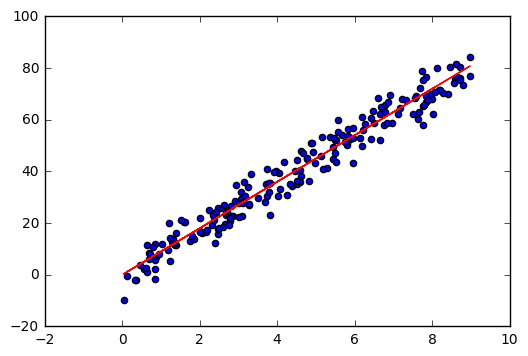

In [8]:
# 각 observation을 점 형태로 출력
plt.scatter(X, y)

# 실선 그래프
plt.plot(X, 9 * X, 'r')

### 공부 시간과 시험 성적간에 관계
 - X가 증가 함에 따라 y도 증가
 - X의 증가량과 y의 증가량이 서로 선형적(1차원)
 - 따라서 1차원의 수식으로 다음과 같이 표현 가능
 - y = $\alpha_1$X + $\alpha_0$
   - $\alpha_1$ : coefficient for X
   - $\alpha_0$ : intercept 
 - **model(모델)**을 생성한다는 것은 위에서의 모든 coefficient를 **learning(학습)**하는 것을 의미
 - 모든 coefficient의 값이 **학습** 되었다면, 해당 모델을 사용하여 새로운 값을 **predict(예측)에 사용**

### Linear Regression
 - 모델 생성시간이 빠름
 - 모델을 생성하는데 parameter가 필요치 않음
 - 모델을 쉽게 이해할 수 있음
 - 모델이 데이터 사이의 관계를 제대로 파악하지 못할 수 있음 **(UnderFitting)**
   - linear 관계로 가정하기 때문
 - 다른 알고리즘과 비교하여 **base model**로 주로 사용 됨

### scikit-learn을 이용한 모델 생성
 - linear_model 서브모듈의 **LinearRegression** 클래스를 이용
 - 모델 생성을 위해 feature와 target이 numpy array로 변환
 - LinearRegression.fit 메쏘드를 이용하여 모델 생성

In [9]:
import sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### coefficeint 확인
 - coef_  : 각 feature의 계수
 - intercept_ : intercept

In [10]:
print type(model)
print model.coef_
print model.intercept_

print model.score(X, y)
# score : coefficient of determintion (r square)
# 1.0이면 해당 모델이 선형적으로 완벽함을 의미
# https://en.wikipedia.org/wiki/Coefficient_of_determination

<class 'sklearn.linear_model.base.LinearRegression'>
[[ 8.97529482]]
[-0.15848251]
0.961361879884


### coefficient 해석
 - 위의 경우 X의 coefficient인 9.08269698을 어떻게 해석할 수 있을까?
   - 단위 공부 시간 1 증가 시, 시험 성적이 9.08269698 점 상승으로 해석 가능
 - 만약 coefficient가 **음수**일 경우, 단위시간 증가 시, coefficient 값 만큼 시험 성적의 **감소**로 해석 가능

### target 예측
 - 위의 결과로 부터 두 변량 사이의 관계를 아래의 식으로 나타낼 수 있음
   - y = 9.08269698 * X + 0.40806695

In [11]:
print model.predict(X[0][0])

# 실제 y 값
print y[0]

[[ 51.94454421]]
[ 51.00711316]


In [12]:
print model.predict(X[1][0])

# 실제 y 값
print y[1]

[[ 3.15668554]]
[-2.10622206]


In [13]:
model.predict(X)

array([[ 51.94454421],
       [  3.15668554],
       [  2.81767826],
       [  0.90774745],
       [ 29.65997091],
       [ 67.99249073],
       [ 43.47958512],
       [ 61.90314207],
       [  7.54116752],
       [ 22.11003261],
       [ 76.90677217],
       [ 26.03742168],
       [ 33.45262606],
       [ 37.36654817],
       [ 12.3356432 ],
       [ 14.07041662],
       [ 35.820293  ],
       [ 20.62620272],
       [  6.11820293],
       [ 77.99828666],
       [  7.68237149],
       [ 23.5887801 ],
       [ 62.29151583],
       [ 21.37052866],
       [ 24.80649008],
       [ 20.94252154],
       [  7.48417236],
       [ 54.91292707],
       [ 25.45853792],
       [ 36.24347636],
       [ 14.42331071],
       [ 76.62995456],
       [ 18.34334392],
       [ 60.46260379],
       [ 46.12143217],
       [ 39.961712  ],
       [ 64.16040744],
       [ 70.20087567],
       [ 40.33889956],
       [ 48.76741251],
       [ 24.67930078],
       [ 78.14663843],
       [ 77.49924467],
       [ 10

### Training, Test set 분할
 - 위의 경우 처럼 전체 데이터 셋을 가지고 모델링을 한 뒤, 해당 데이터로 테스트를 하면 **overfitting** 이 생길 가능성이 높음
 - 이미 해당 데이터가 모델링에 사용되었기 때문에, 모델은 이미 해당 데이터에 대해 안다고 말할 수 있음
 - 따라서 일반적인 경우, 데이터 셋을 training과 test로 분할하여 사용
   - training set : 모델링을 하기 위해 사용
   - test set     : 모델링 된 결과를 검증하기 위해 사용 

In [14]:
from sklearn.model_selection import train_test_split

# train - 75% test - 25% 나뉨
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [15]:
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(160, 1) (40, 1)
(160, 1) (40, 1)


* ** Training set으로 모델 생성**

In [16]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print model.coef_, model.intercept_

[[ 9.05635052]] [-0.67102661]


In [18]:
print model.predict(X_test[0][0])
print y_test[0]

[[ 76.04146347]]
[ 80.3120085]


### Model evaluation metric 
 - regression에서의 모델 평가는 연속적인 값을 비교 가능한 척도여야 함
 - 따라서, accuracy가 아닌 **RMSE(Root Mean Squared Error)**가 주로 사용 됨
 $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
 - 위의 식에서 알 수 있듯이, 그 값이 작을수록 성능이 좋고, 높을수록 성능이 낮음

In [19]:
from sklearn import metrics
predict_y = model.predict(X_test)

# rmse
print np.sqrt(metrics.mean_squared_error(predict_y, y_test))

print model.score(X_test, y_test)

4.86432327572
0.951644613939


* train / test 비율을 달리하여 rmse 확인
 - feature가 여러개인 경우에는 각 feature의 여러 조합으로 rmse 확인 하며 model update

In [20]:
from sklearn.model_selection import train_test_split
# train - 75% test - 25% 나뉨
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

predict_y = model.predict(X_test)

# rmse
print np.sqrt(metrics.mean_squared_error(predict_y, y_test))
print model.score(X_test, y_test)

4.80646988609
0.949841971429


### Cross validation
 - train, test 데이터로 나뉘어 model fitting을 진행할 때, test set의 데이터가 train에 leak(유출)될 가능성이 있음
   - model을 검증하면서 test 데이터를 확인하기 떄문에, 실험자가 test set의 데이터에 model을 맞추려는 경향이 생김
 - 이 경우, 역시 **overfitting**이 발생하기 때문에, 또 하나의 새로운 set이 필요함 **(Validation set)**
 - 즉, train과 validation으로 전과 같이 모델을 생성하고, 모델 생성에 대한 실험이 성공적이라 판단되면, 마지막에 test set으로 모델을 검증
   - test 데이터는 모델링 하는 동안에는 절대 사용하지 않음 
 - 데이터가 더 나뉘어지므로, 사실 train 데이터가 줄어들고, 이는 train, validation 데이터가 어떻게 구성되느냐에 따라 다른 결과를 초래함
 - 위의 문제를 위해 나온 방법이 Cross-validation이라고 함
   - test set의 경우 CV에서도 마지막에 검증하기 위해 사용 됨
   - k-fold CV
     - test set을 제외하고 k개의 데이터 셋으로 분할
     - 각 k-1개로 train 뒤, 1개 셋으로 validation 진행
     - 이후, 각 k개의 validation 대한 평균으로 성능을 계산

In [21]:
from sklearn.model_selection import cross_val_score
model = linear_model.LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=10)
scores

array([ 0.97198282,  0.86494022,  0.97694291,  0.94884702,  0.94159945,
        0.96330176,  0.97225102,  0.96924843,  0.96537222,  0.97861776])

In [22]:
# 평균 score
scores.mean()

0.95531036016272741

In [23]:
# cross-validation 결과가 충분하다고 판단되면, test set에 테스트
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.94984197142926852

### Kaggle House Prices 예제
 - 집값 예측 문제

* ** Data loading **
 - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data\

In [4]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [25]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [26]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

* **Take a quick look **
 - 80개의 feature
 - target : SalePrice

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

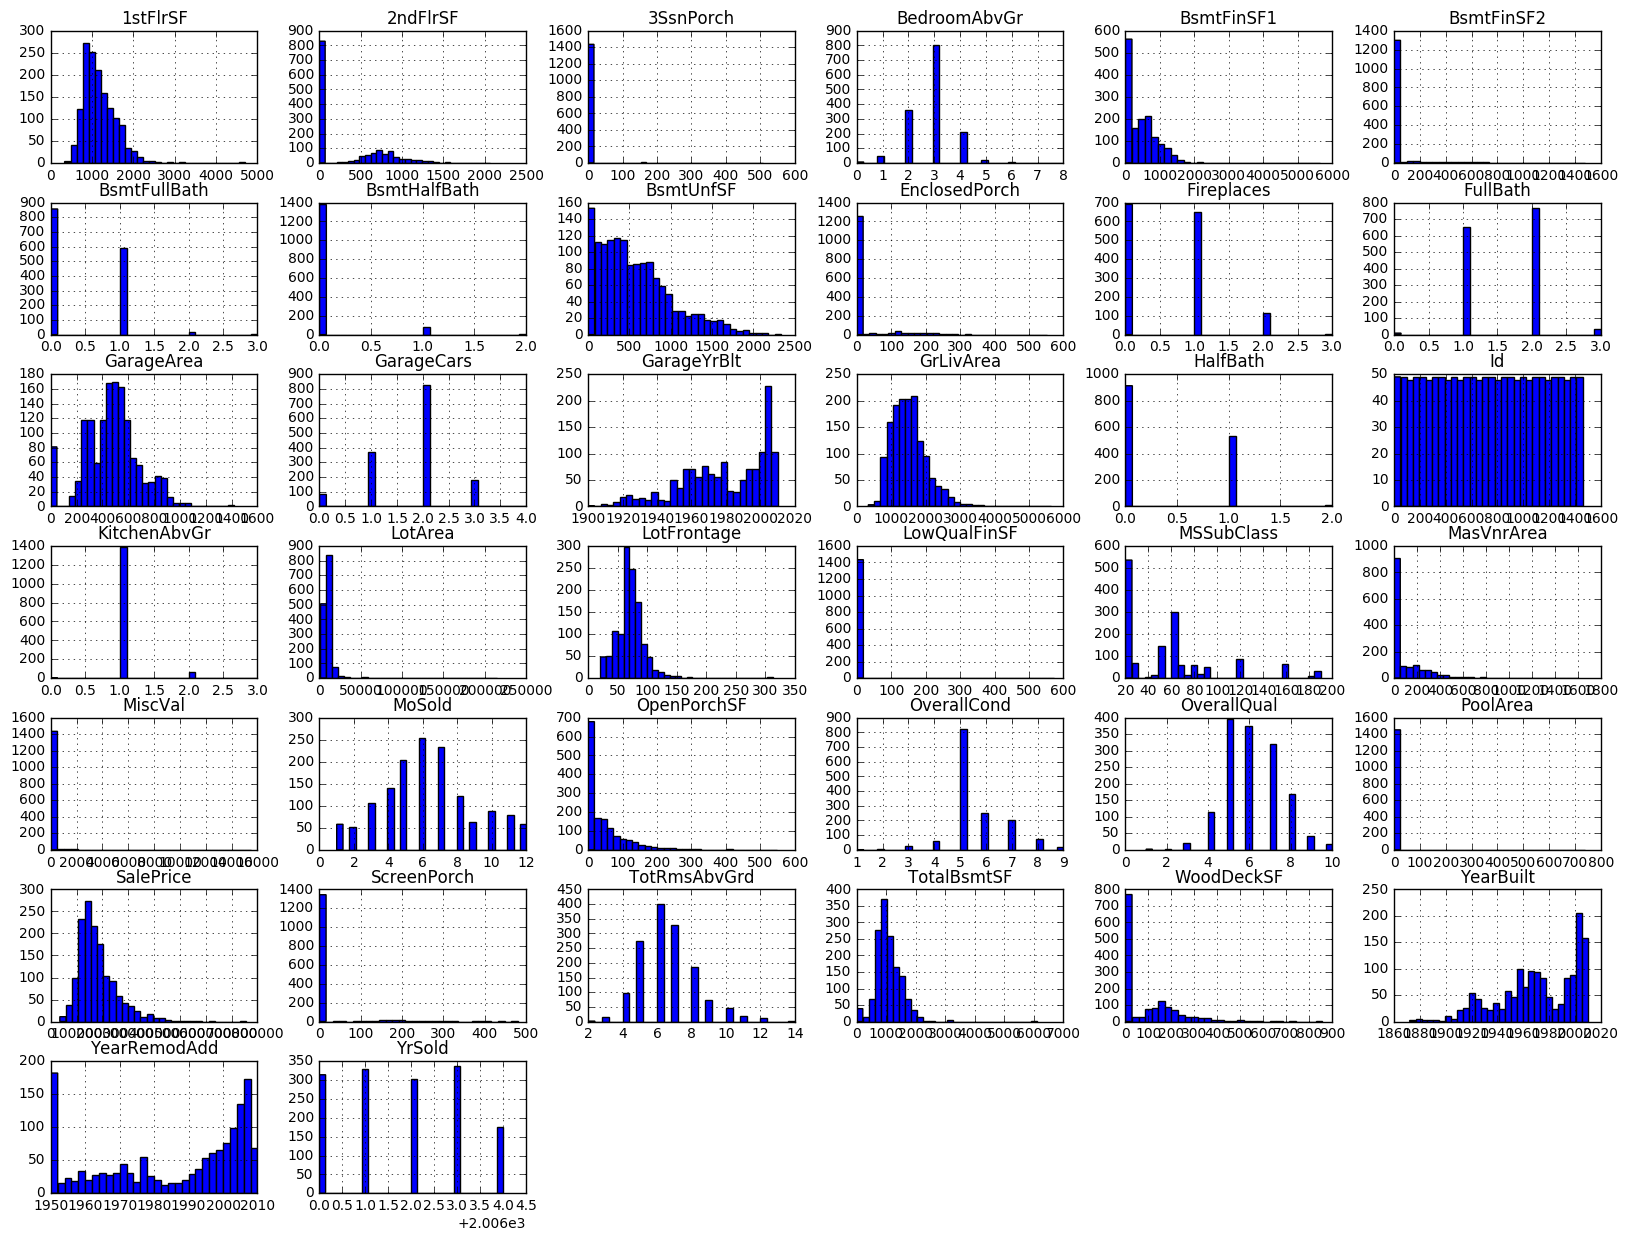

In [31]:
# 히스토그램 생성
train.hist(bins=30, figsize=(20,15))
plt.show()

* ** SalePrice**
 - 해당 문제에서의 target 변수

In [32]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

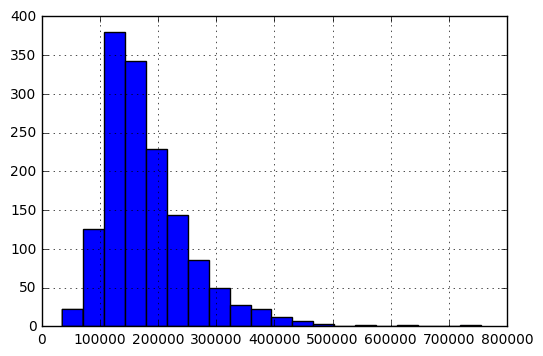

In [33]:
train['SalePrice'].hist(bins=20)

* ** Correlation**
 - 각 feature끼리의 상관관계(Pearson's r)을 corr함수를 이용하여 계산
 - 값의 범위는 [-1, 1]
   - 1에 가까울수록 strong positive correlation(값이 증가함에 따라 값이 증가하는 경우)
   - -1에 가까울수록 strong negative correlation(값이 증가함에 따라 값이 감소하는 경우)
   - 0에 가까울수록 관계도가 적다고 해석 가능
   - 이때, 상관관계는 오직 linear 관계만을 측정

In [34]:
corr_matrix = train.corr()

In [35]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [36]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e2bee50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e7a92d0>]], dtype=object)

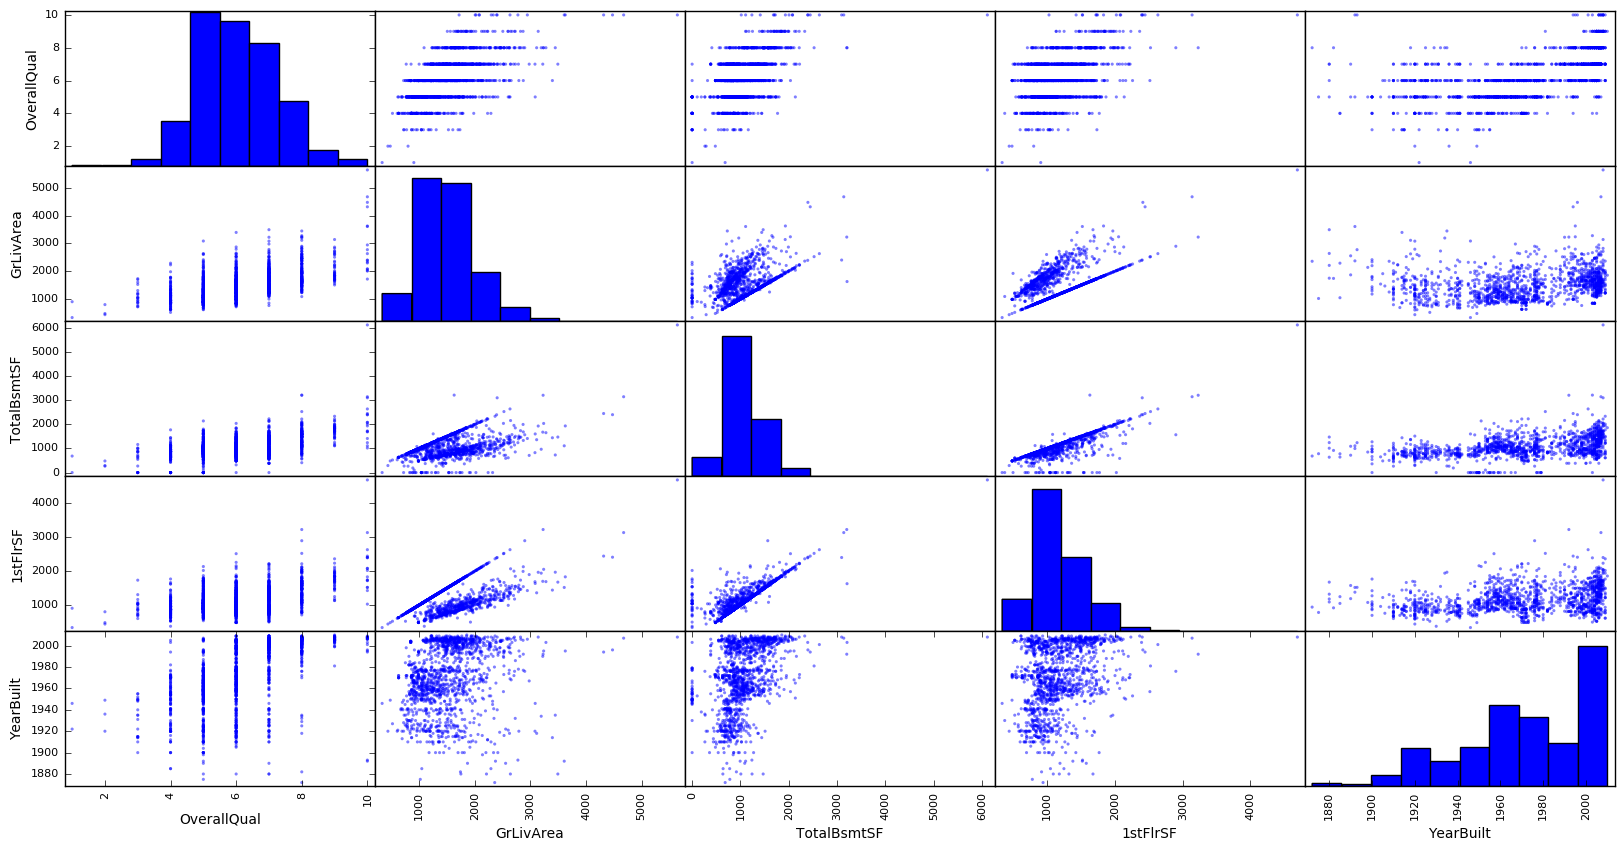

In [37]:
from pandas.plotting import scatter_matrix

# 상관계수가 높은 feature들 중, 일부 추출하여 실험 진행
attributes = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
scatter_matrix(train[attributes], figsize=(20, 10))

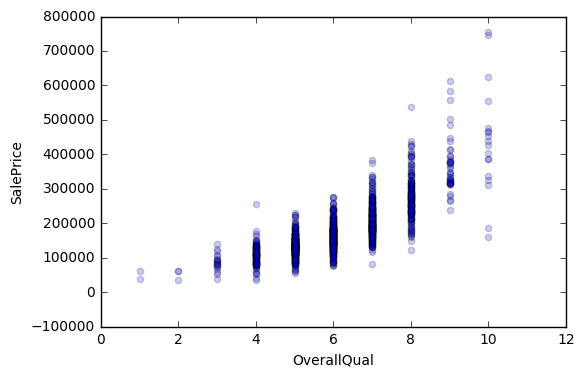

In [38]:
train.plot(kind='scatter', x='OverallQual', y='SalePrice', alpha=0.2)

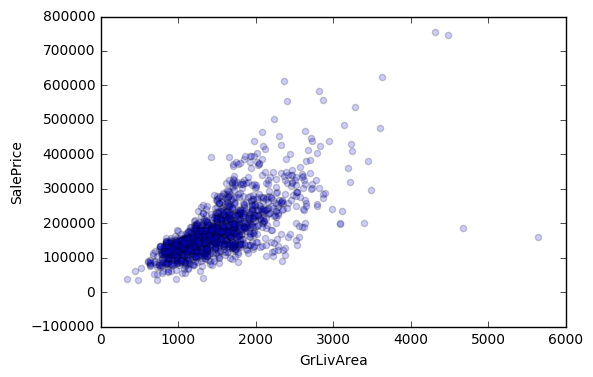

In [39]:
train.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.2)

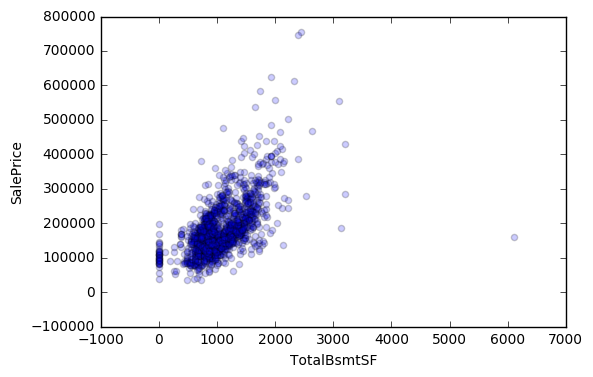

In [40]:
train.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', alpha=0.2)

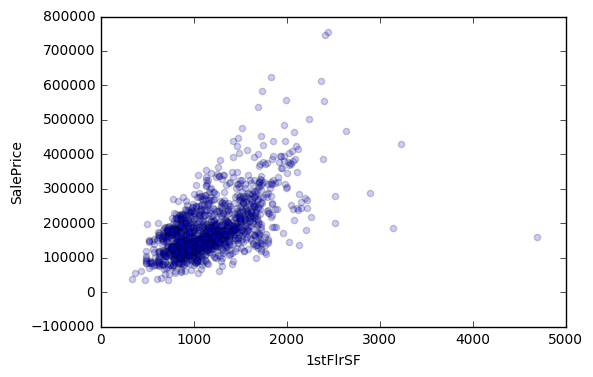

In [41]:
train.plot(kind='scatter', x='1stFlrSF', y='SalePrice', alpha=0.2)

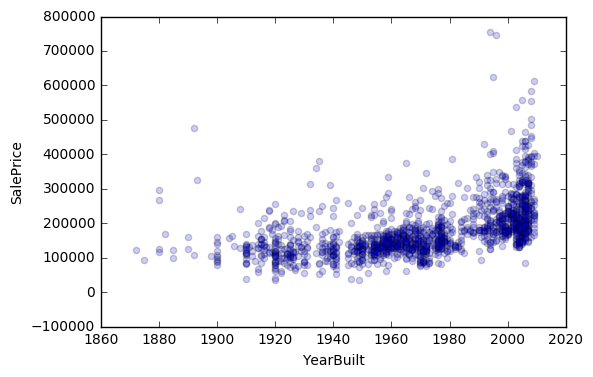

In [42]:
train.plot(kind='scatter', x='YearBuilt', y='SalePrice', alpha=0.2)

* **Data Cleansing**
 - 대부분의 machine learning 알고리즘이 missing-feature에 대해 제대로 동작하지 못함
 - 따라서, 해당 값들에 대한 처리가 필요
   - NaN 데이터만 drop
   - NaN을 갖는 모든 컬럼을 drop
   - NaN을 특정한 값(평균 등)으로 채움

In [45]:
# nan 데이터 drop
train.dropna(subset=['YearBuilt'])

#print train['YearBuilt'][train['YearBuilt'].isnull()]

# nan 컬럼 drop
train.drop('some_feature', axis=1)

# 값 채우기
median = train['YearBuilt'].median()
train['YearBuilt'].fillna(median)

Series([], Name: YearBuilt, dtype: int64)


ValueError: labels ['some_feature'] not contained in axis

In [46]:
# 해당 데이터의 경우, Promising feature에서 NaN 없음
np.sum(train[attributes].isnull(), axis=0)

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
1stFlrSF       0
YearBuilt      0
dtype: int64

* ** Text & Categorical Features **
 - MSZoning feature의 경우 numerical 값이 아니리 때문에, 지금까지 상관관계나 cleansing 등에서 배제
 - 대부분의 ML 알고리즘은 숫자를 다루기 때문에, 해당 값에 대한 숫자로의 변환이 필요

In [47]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [48]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [49]:
train['MSZoning'].isnull().sum()

0

In [ ]:
train['MSZoning'].value_counts()

* ** LabelEncoder **
 - 존재하는 모든 값에 대해 0-based 숫자값으로 1 : 1 대응하여 encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
MSZoning = train['MSZoning']
MSZoning_encoded = encoder.fit_transform(MSZoning)
MSZoning_encoded

array([3, 3, 3, ..., 3, 3, 3])

In [51]:
encoder.classes_

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

* ** One-Hot Encoding ** 
 - 각 값별로 새로운 필드가 생성되어 해당 값에 해당하는 필드만 1이되고 나머지는 0이 되도록 encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
MSZoning_1hot = encoder.fit_transform(MSZoning_encoded.reshape(-1, 1))
MSZoning_1hot

<1460x5 sparse matrix of type '<type 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [8]:
MSZoning_1hot.toarray()

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

* **LabelBinarizer**
 - 위의 두 작업을 한번에 처리

In [54]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

MSZoning_1hot = encoder.fit_transform(MSZoning)
MSZoning_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

### Feature Scaling
 - 대부분의 경우, 각 feature간의 scale(값의 단위)의 차이가 심하면 성능이 제대로 나오지 않음
 - 이 경우, 각 데이터의 feature간의 scale을 맞춰줄 필요가 있음
   - min-max scaling
     - (X - min) / (max - min)
   - standardization
     - (X - mean) / var
 - **LinearRegression의 경우 feature scailing의 영향이 없음**

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [57]:
scaler = MinMaxScaler()
scaler.fit_transform(train['GrLivArea'].reshape(-1, 1))
#scaler.fit_transform(train['GrLivArea'].values.reshape(-1, 1))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.25923135],
       [ 0.17483044],
       [ 0.27354936],
       ..., 
       [ 0.37792012],
       [ 0.14016579],
       [ 0.17370008]])

In [58]:
scaler = StandardScaler()
scaler.fit_transform(train['GrLivArea'].values.reshape(-1, 1))

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.37033344],
       [-0.48251191],
       [ 0.51501256],
       ..., 
       [ 1.56964722],
       [-0.83278768],
       [-0.49393395]])

### Training
 - feature, target ndarray로 각각 나눈 뒤, training 실행
 - 사용할 알고리즘을 import 하여 객체 생성 한뒤, fit 메쏘드를 호출하여 training
 - LinearRegression의 경우, 크게 신경써서 설정할 parameter가 없음

In [59]:
# target 생성
house_target = train['SalePrice'].copy()
house_target

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [60]:
model = linear_model.LinearRegression()
model.fit(train[attributes], house_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
model.coef_

array([  2.26519285e+04,   5.17855043e+01,   1.99424476e+01,
         1.81922202e+01,   4.23382147e+02])

In [62]:
price_predictions = model.predict(train[attributes])

In [63]:
# training rmse 계산
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(house_target, price_predictions)
rmse = np.sqrt(mse)
rmse

38903.363070571264

### Pipelining
 - 데이터 준비 작업의 단계가 순서에 맞게 실행되야 하기 때문에, 일반적으로 pipeline을 구성하여 실행
 - Pipeline : 각 파이프라인의 task 구성
 - FeatureUnion : 파이프라인을 연결하여 하나의 파이프라인을 생성

In [64]:
# pandas -> numpy ndarray

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

feature_pipeline = Pipeline([
                    ('selector', DataFrameSelector(attributes)),
                    #('selector', DataFrameSelector(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars','YearBuilt'])),
                    ('std_scaler', StandardScaler()),
])

mszoning_pipeline = Pipeline([
                    ('selector', DataFrameSelector(['MSZoning'])),
                    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
                    ('feature_pipeline', feature_pipeline),
                    ('mszoning_pipeline', mszoning_pipeline)
])


transformed_train = full_pipeline.fit_transform(train)

In [76]:
model2 = linear_model.LinearRegression()
model2.fit(transformed_train, house_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
price_predictions2 = model2.predict(transformed_train)

In [72]:
mse = mean_squared_error(house_target, price_predictions2)
rmse = np.sqrt(mse)
rmse

38903.363070571257

* cross validation score 확인

In [73]:
print cross_val_score(model, train[attributes], house_target)
print cross_val_score(model, train[attributes], house_target, scoring='neg_mean_squared_error')

[ 0.81048441  0.75703075  0.68448721]
[ -1.15458280e+09  -1.64743066e+09  -1.90434874e+09]


In [77]:
print cross_val_score(model2, transformed_train, house_target)
print cross_val_score(model2, transformed_train, house_target, scoring='neg_mean_squared_error')

[ 0.81139181  0.75614305  0.68852377]
[ -1.14905462e+09  -1.65344965e+09  -1.87998512e+09]


* 위의 모델링 작업을 다양한 feature 조합에 대해 반복
* 혹은 새로운 feature를 생성(기존의 feature를 서로 나누거나 곱하는 등)하여 반복

### Conclusion
 - Linear Regression은 최초에 시도해볼 수 있는 가장 기본이되는 알고리즘
   - 추후, Decision Tree, SVM, ensemble method등과 비교
 - feature와 target 사이에 선형적인 관계가 있다면 Linear Regression으로도 충분히 좋은 모델 생성이 가능
 - 위의 경우에는 cross validation score의 경우 차이가 큰데, 이것으로 해당 데이터를 linear하게 모델링 하는 것에 대한 한계가 있음을 알 수 있음
     - 따라서, linear regression 이외에 다른 알고리즘 적용 및 테스트가 필요

In [83]:
import graphviz

In [85]:
import cufflinks

ImportError: No module named talib

In [ ]:
#http://www.lfd.uci.edu/~gohlke/pythonlibs/
#http://landinghub.visualstudio.com/visual-cpp-build-tools